<a href="https://colab.research.google.com/github/Bhumika2104/Material-Classification/blob/main/Mineral_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [ ]:
!kaggle datasets download -d asiedubrempong/minerals-identification-dataset

100% 230M/230M [00:08<00:00, 34.4MB/s]
100% 230M/230M [00:08<00:00, 27.2MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/minerals-identification-dataset.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
train_path = "/content/minet"

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow

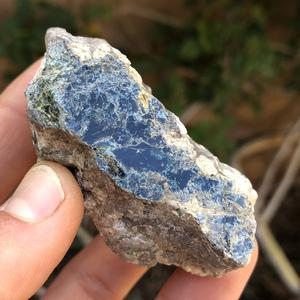

(300, 300, 3)

In [ ]:
img = cv2.imread("/content/minet/biotite/0004.jpg")
cv2_imshow(img)
img.shape

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense

In [ ]:
model = Sequential()

model.add(Conv2D(128,kernel_size =(3,3),padding='valid',activation='relu',input_shape=(300,300,3)))


model.add(Conv2D(64,kernel_size =(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size =(2,2),strides =2,padding='valid'))


model.add(Conv2D(32,kernel_size =(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size =(2,2),strides =2,padding='valid'))




model.add(Flatten())

model.add(Dense(2000,activation='relu'))

model.add(Dense(1000,activation='relu'))

model.add(Dense(7,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 128)     3584      
                                                                 
 conv2d_1 (Conv2D)           (None, 296, 296, 64)      73792     
                                                                 
 max_pooling2d (MaxPooling2  (None, 148, 148, 64)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 146, 146, 32)      18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 73, 73, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 170528)            0

In [ ]:
model.compile(loss = "categorical_crossentropy" ,optimizer = "SGD" ,metrics = ['accuracy'])
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale =1./255,
                    shear_range=0.3,
                    zoom_range=0.3,
                    horizontal_flip=True,
                    fill_mode='nearest'

)



train_generator = train_datagen.flow_from_directory(
    train_path,
    color_mode = 'rgb',

    batch_size=32,
    target_size=(300,300),
    class_mode='categorical',
    shuffle=True
)





Found 957 images belonging to 7 classes.


In [ ]:
from keras.callbacks import EarlyStopping

# Define the early stopping callback
early_stopping = EarlyStopping(patience=3, verbose=3)

history = model.fit(
    train_generator,
    epochs=15,

    callbacks=[early_stopping]  # Add the EarlyStopping callback to the training process
)


Epoch 1/15
30/30 [==============================] - ETA: 0s - loss: 1.8184 - accuracy: 0.2874

30/30 [==============================] - 57s 1s/step - loss: 1.8184 - accuracy: 0.2874
Epoch 2/15
30/30 [==============================] - ETA: 0s - loss: 1.6784 - accuracy: 0.3657

30/30 [==============================] - 31s 1s/step - loss: 1.6784 - accuracy: 0.3657
Epoch 3/15
30/30 [==============================] - ETA: 0s - loss: 1.7337 - accuracy: 0.3156

30/30 [==============================] - 33s 1s/step - loss: 1.7337 - accuracy: 0.3156
Epoch 4/15
30/30 [==============================] - ETA: 0s - loss: 1.6709 - accuracy: 0.3574

30/30 [==============================] - 32s 1s/step - loss: 1.6709 - accuracy: 0.3574
Epoch 5/15
30/30 [==============================] - ETA: 0s - loss: 1.5655 - accuracy: 0.4023

30/30 [==============================] - 33s 1s/step - loss: 1.5655 - accuracy: 0.4023
Epoch 6/15
30/30 [==============================] - ETA: 0s - loss: 1.3687 - accuracy: 0.4357

30/30 [==============================] - 32s 1s/step - loss: 1.3687 - accuracy: 0.4357
Epoch 7/15
30/30 [==============================] - ETA: 0s - loss: 1.3384 - accuracy: 0.4723

30/30 [==============================] - 33s 1s/step - loss: 1.3384 - accuracy: 0.4723
Epoch 8/15
30/30 [==============================] - ETA: 0s - loss: 1.2318 - accuracy: 0.5183

30/30 [==============================] - 32s 1s/step - loss: 1.2318 - accuracy: 0.5183
Epoch 9/15
30/30 [==============================] - ETA: 0s - loss: 1.1229 - accuracy: 0.5622

30/30 [==============================] - 33s 1s/step - loss: 1.1229 - accuracy: 0.5622
Epoch 10/15
30/30 [==============================] - ETA: 0s - loss: 1.0911 - accuracy: 0.5789

30/30 [==============================] - 32s 1s/step - loss: 1.0911 - accuracy: 0.5789
Epoch 11/15
30/30 [==============================] - ETA: 0s - loss: 1.0367 - accuracy: 0.6196

30/30 [==============================] - 33s 1s/step - loss: 1.0367 - accuracy: 0.6196
Epoch 12/15
30/30 [==============================] - ETA: 0s - loss: 1.0451 - accuracy: 0.6092

30/30 [==============================] - 33s 1s/step - loss: 1.0451 - accuracy: 0.6092
Epoch 13/15
30/30 [==============================] - ETA: 0s - loss: 0.9238 - accuracy: 0.6343

30/30 [==============================] - 32s 1s/step - loss: 0.9238 - accuracy: 0.6343
Epoch 14/15
30/30 [==============================] - ETA: 0s - loss: 0.8602 - accuracy: 0.6844

30/30 [==============================] - 34s 1s/step - loss: 0.8602 - accuracy: 0.6844
Epoch 15/15
30/30 [==============================] - ETA: 0s - loss: 1.0038 - accuracy: 0.6301

30/30 [==============================] - 31s 1s/step - loss: 1.0038 - accuracy: 0.6301


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
test_img = cv2.imread('/content/minet/malachite/0008.jpg')
test_img = cv2.resize(test_img,(300,300))
test_input1 = test_img.reshape((1,300,300,3))
prediction = model.predict(test_input1)
pred_label = np.argmax(prediction)
print(pred_label)

1/1 [==============================] - 1s 524ms/step
6


In [ ]:
import os
folder = '/content/minet'
sub_folder = [name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder,name))]

In [ ]:
sub_folder[3]

'malachite'